# Промежуточная аттестация. Датасет энергопотребления штатов Индии 2019-2020.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Читаем данные

In [2]:
df = pd.read_csv('https://github.com/Screamerino/Innopolis-AI/raw/master/data/dataset_tk.csv')


## Выделение признаков

Посчитаем общее энергопотребление всех штатов за день, выделим из даты год, месяц и номер дня.

In [3]:
df['total'] = [sum(df.iloc[i, 1:]) for i in range(df.shape[0])]

In [4]:
df['date'] = pd.to_datetime(df.iloc[:, 0], dayfirst=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
state_cols = list(df.drop(['total', 'date'], axis=1).columns)


In [5]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df.set_index('date', inplace=True)

Вот так сейчас выглядит датафрейм

In [6]:
df.head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,total,year,month,day
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,21.7,2.7,6.1,1.9,2.2,3.4,3373.4,2019,1,2
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,23.4,2.4,6.5,1.8,2.2,3.6,3403.7,2019,1,3
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,21.7,2.4,6.3,1.7,2.2,3.5,3304.1,2019,1,4
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,22.5,2.7,5.7,1.8,2.3,3.5,3308.9,2019,1,5
2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,21.7,2.7,6.2,1.9,2.3,3.3,3316.9,2019,1,6


## Аналитика по годам и месяцам

Посмотрим на топ-10 штатов по энергопотреблению по годам

In [7]:
sum_by_years = df.groupby('year').sum()[state_cols]

In [8]:
top_10_states_in_2019 = sum_by_years.loc[2019].sort_values(ascending=False).head(10)

In [9]:
top_10_states_in_2019

Maharashtra       154916.7
Gujarat           115357.4
UP                112689.9
Tamil Nadu        106720.2
Rajasthan          78138.8
MP                 74974.6
Karnataka          73076.9
Telangana          67449.6
Andhra Pradesh     63097.0
West Bengal        49868.7
Name: 2019, dtype: float64

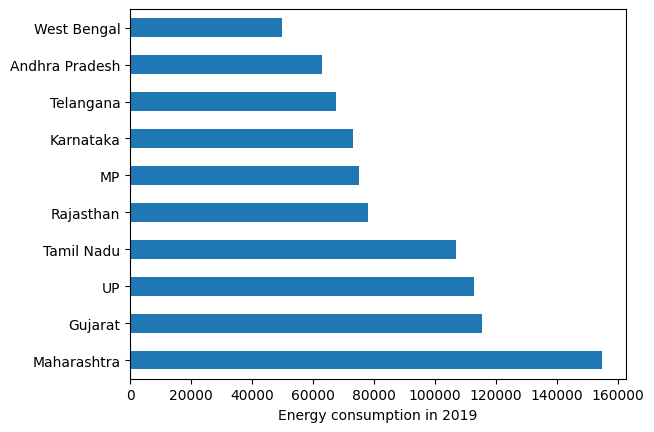

In [10]:
ax = top_10_states_in_2019.plot.barh()
ax.set_xlabel('Energy consumption in 2019')
plt.show()

In [11]:
top_10_states_in_2020 = sum_by_years.loc[2020].sort_values(ascending=False).head(10)

In [12]:
top_10_states_in_2020

Maharashtra       62163.1
Gujarat           47131.5
UP                45270.4
Tamil Nadu        44551.3
Rajasthan         31738.2
MP                29791.8
Karnataka         29588.8
Telangana         26615.7
Andhra Pradesh    25507.4
Punjab            21360.5
Name: 2020, dtype: float64

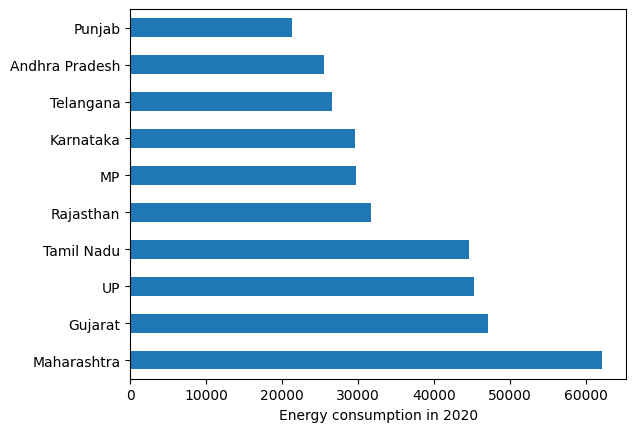

In [13]:
ax = top_10_states_in_2020.plot.barh()
ax.set_xlabel('Energy consumption in 2020')
plt.show()

Список топ-9 штатов не изменился, но изменилось количество энергии затраченной за год. Высчитаем разницу и процент для штата Maharashtra

In [14]:
abs(top_10_states_in_2020['Maharashtra'] - top_10_states_in_2019['Maharashtra'])

92753.6

In [15]:
round(abs(top_10_states_in_2019['Maharashtra'] / top_10_states_in_2020['Maharashtra']) * 100, 2)

249.21

Разница более чем в два раза! Видимо, в 2020 году случилось что-то замедлившее потребление энергии в 2 раза, а то и больше. Если вспомнить про короновирус и локдаун, то все становится очевидно! В 2020 году, ближе к апрелю, маю всемирный локдаун привел к уменьшению энергопотребления, что как раз таки можем заметить по примерам из датасета.

Посмотрим, чтобы убедиться в этом на распределение энергопотребления по месяцам и годам.

In [16]:
sum_by_year_months = df.groupby(by=['year', 'month']).sum()

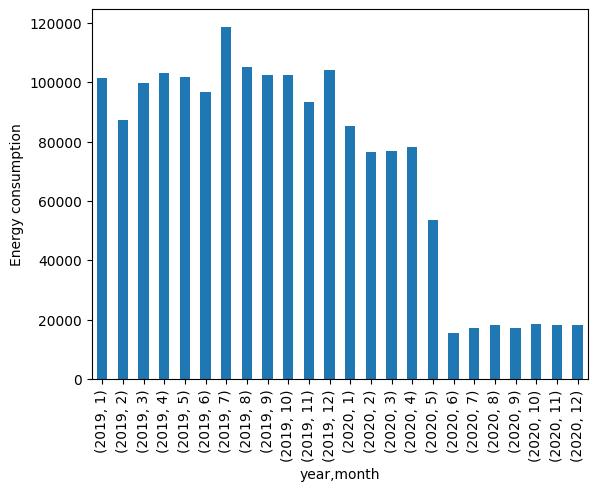

In [17]:
ax = sum_by_year_months['total'].plot.bar()
ax.set_ylabel('Energy consumption')
plt.show()

Как раз таки замечаем последовательное снижение энергопотребления. Резкий скачок вниз в июне 2020 говорит о полном локдауне во всех штатах. Скорее всего далее мы также увидим выбросы в этот месяц (спойлер не везде, так как где-то энергопотребление не изменилось: в бедных штатах и так невысокое энергопотребление, локдаун не сильно понизил бы это число (ИМХО, данных по бедности не представлены)). 

In [18]:
sum_by_year_months['total'][2019][7] / sum_by_year_months['total'][2020][7]

6.923260578960579

Разница энергопотребления в Июле в разные года: разница почти в 7 раз!

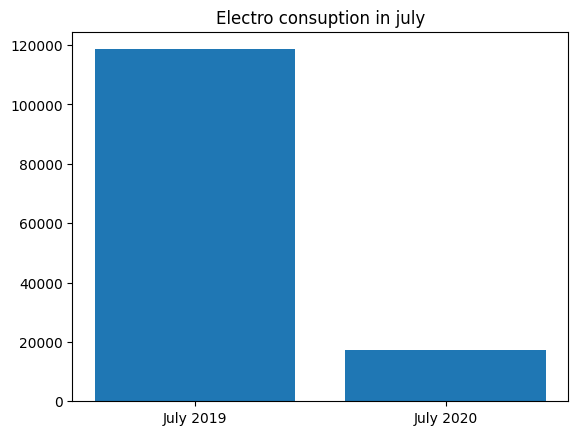

In [19]:
plt.bar(['July 2019', 'July 2020'], [sum_by_year_months['total'][2019][7], sum_by_year_months['total'][2020][7]])
plt.title('Electro consuption in july')
plt.show()

## Описательная статистика и выбросы
Посмотрим описательную статистику. Можем заметить, что медианы некоторых штатов (Rajasthan, UP etc.) велики, посравнению с маленькими штатам (example: Chandigarh). Так как у нас нет данных по количеству населения, площади штатов, данные цифры могут говорить о бедных штатах и малой по численности населения или площади штатов. Посмотрим распределение значений с помощью boxplot'ов.

In [20]:
df.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,total,year,month,day
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487,3399.061431,2019.286282,5.910537,15.318091
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047,326.369372,0.452473,3.464957,9.065400
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000,2555.800000,2019.000000,1.000000,1.000000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000,3201.600000,2019.000000,3.000000,6.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000,3388.900000,2019.000000,5.000000,16.000000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000,3647.650000,2020.000000,9.000000,23.000000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000,4059.100000,2020.000000,12.000000,31.000000


In [21]:
def get_outliers(df, col, mode='all'):
    data = df[col]
    q3, q1 = np.percentile(data, [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    if mode == 'all':
        mask = (data < lower_bound) | (data > upper_bound)
    elif mode == 'upper':
        mask = data > upper_bound
    elif mode == 'lower':
        mask = data < lower_bound
    else:
        raise ValueError('Invalid parameter `mode`. Use `all`, `upper` or `lower` values')
    return df[mask][[col, 'year', 'month']]

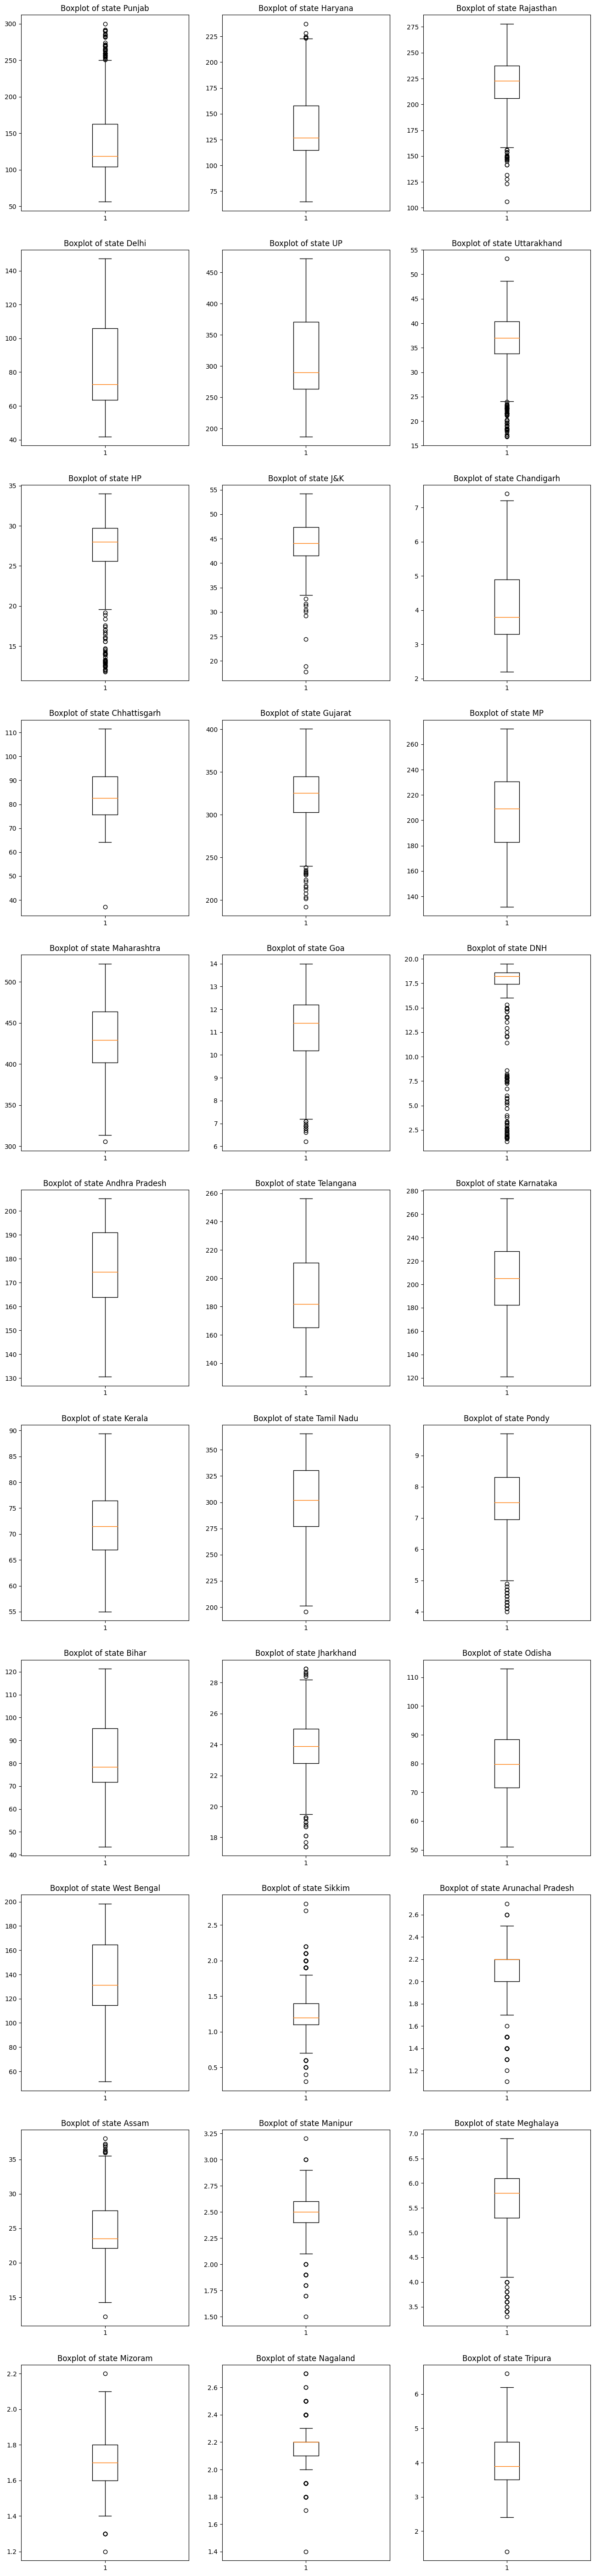

In [23]:
fig, ax = plt.subplots(11, 3, figsize=(16, 72))
list_states = list(df.columns)[::-1]
for i in range(11):
    for j in range(3):
        col = list_states.pop()
        ax[i, j].boxplot(df[col])
        ax[i, j].set_title(f'Boxplot of state {col}')
plt.show()

Посмотрим на природу выбросов

In [24]:
get_outliers(df, 'Tamil Nadu') # непримечательная дата

,Tamil Nadu,year,month
date,,,
2019-06-09,195.7,2019,6


По выбросам тяжело сказать, что выбросы соответствуют началу локдауна. Посмотрим еще на пару примеров

In [25]:
get_outliers(df, 'Maharashtra') # тоже непримечательная дата

,Maharashtra,year,month
date,,,
2019-02-07,305.6,2019,2


In [26]:
get_outliers(df, 'Jharkhand', mode='lower') # тоже непримечательные дата. можно за уши притянуть 2020-05-13 но остальные кажутся странными

,Jharkhand,year,month
date,,,
2019-01-09,19.2,2019,1
2019-01-28,18.7,2019,1
2019-04-06,17.4,2019,4
2019-05-11,19.0,2019,5
2019-07-09,18.8,2019,7
2019-07-10,19.0,2019,7
2019-08-11,19.3,2019,8
2019-08-12,17.4,2019,8
2020-01-17,18.1,2020,1


Посмотрим как энергопотребление меняется по штатам в течение месяца в виде обычного графика. 

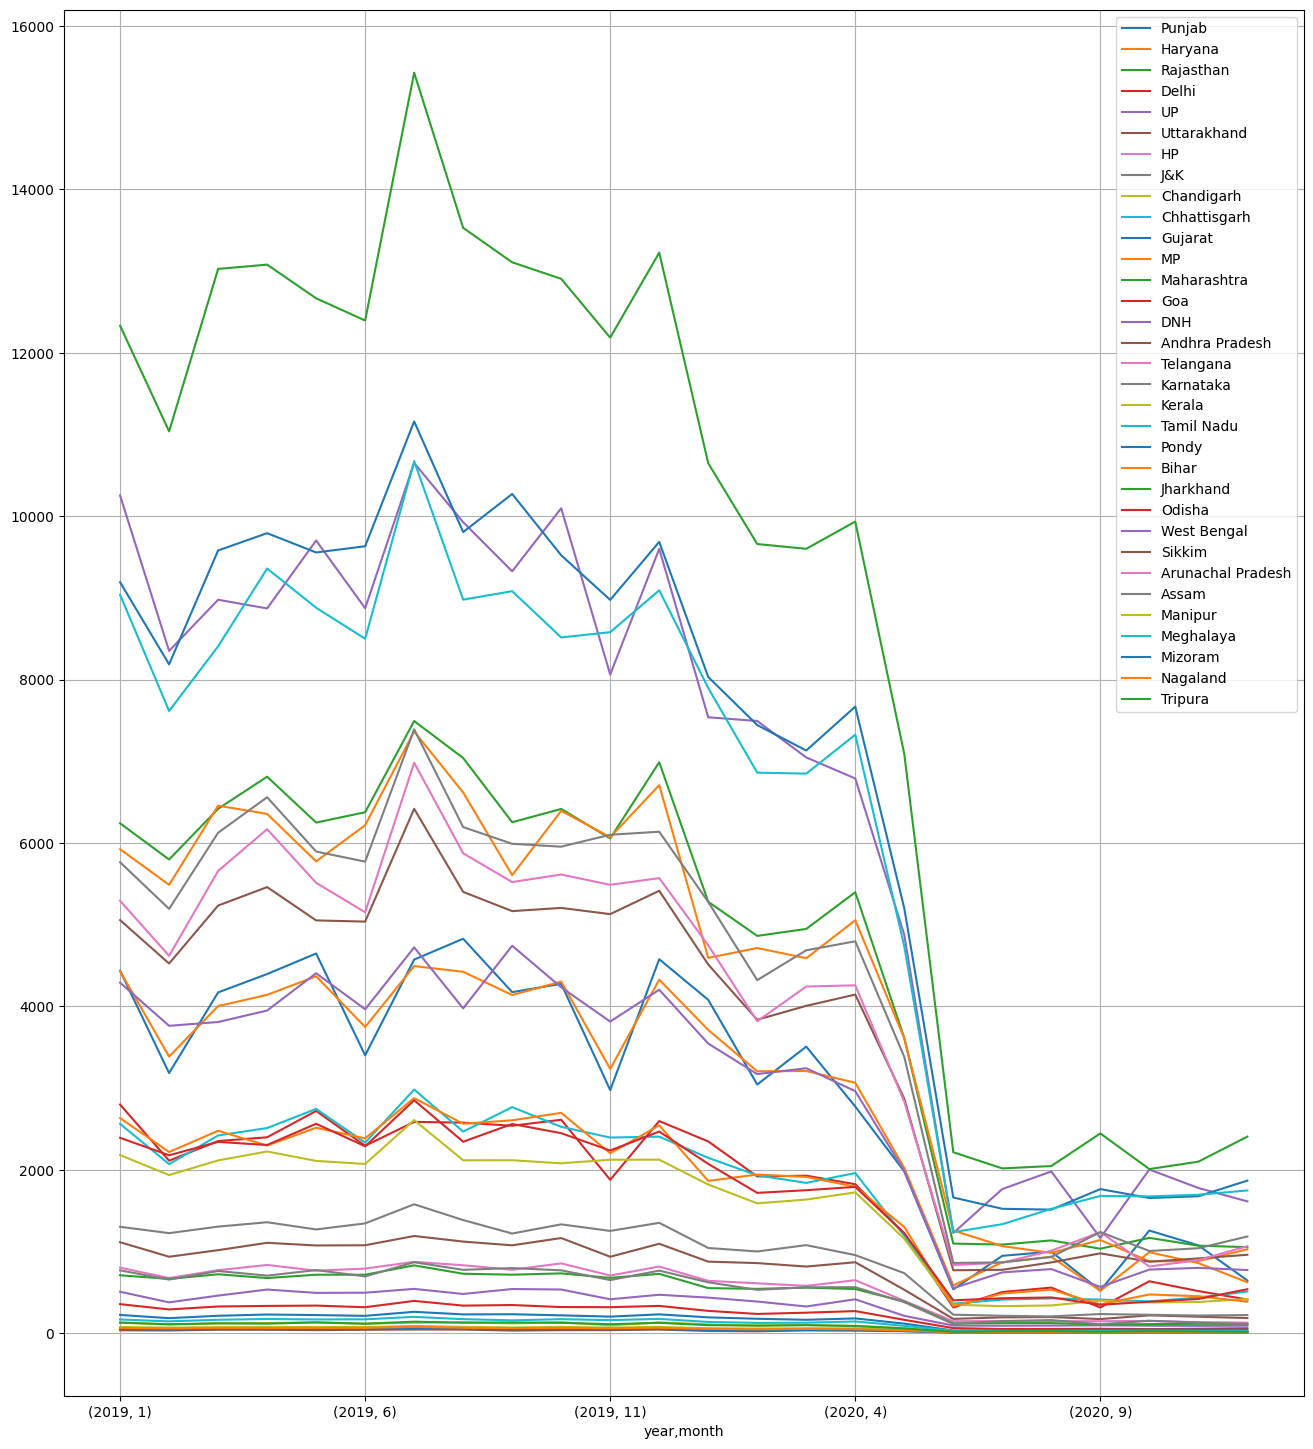

In [48]:
grouped_data_by_months = df.groupby(by=['year', 'month']).sum()[state_cols]
ax = grouped_data_by_months.plot(figsize=(16, 18), grid=True)
plt.show()

Видим всеобщий скочок вниз в июне 2020. Также заметим штаты, которые практически не изменились в июне 2020 года по значению энергопотребления. Построим графики отдельно для топ-10 штатов по энергопотреблению с двух сторон палки.

In [49]:
cols_max_energy_top5 = list(sum_by_years.loc[2020].sort_values(ascending=False).head(5).index)

In [50]:
cols_min_energy_top5 = list(sum_by_years.loc[2020].sort_values().head(5).index)

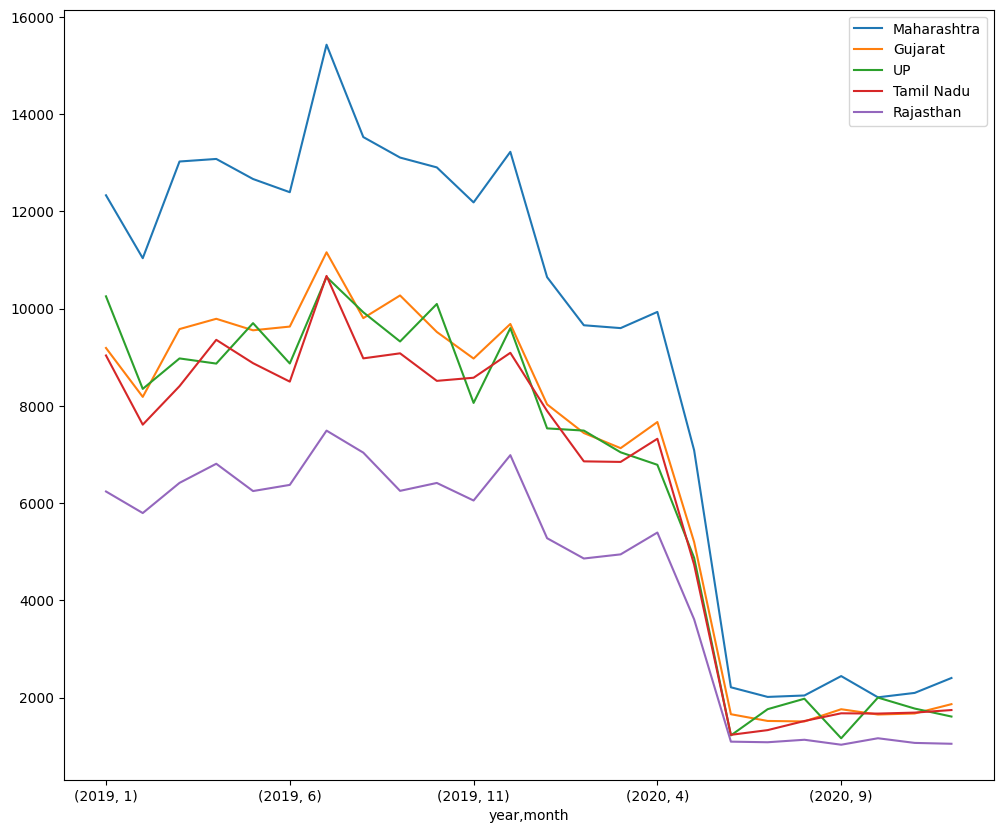

In [51]:
df.groupby(by=['year', 'month']).sum()[cols_max_energy_top5].plot(figsize=(12, 10))
plt.show()

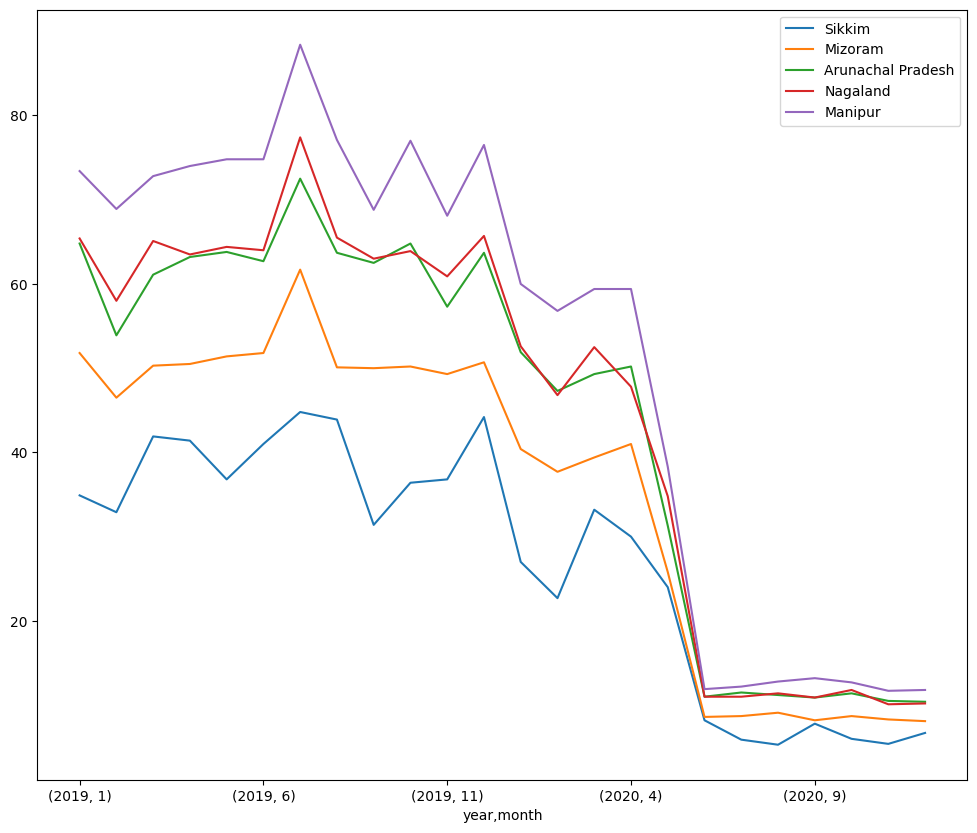

In [52]:
df.groupby(by=['year', 'month']).sum()[cols_min_energy_top5].plot(figsize=(12, 10))
plt.show()

Скачок заметен для топ5 по наименьшему энергопотреблению, но насколько этот скачок отличается от топа по наибольшему энергопотреблению, давайте высчитаем. До этого мы высчитали разницу в июле для большого штата, продублируем их для месяца Июль. Также попробуем высчитать разницы для топа по энергозатратам с другого конца

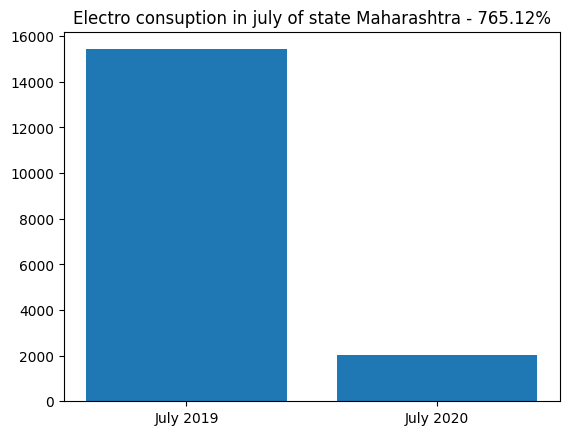

In [53]:
plt.bar(['July 2019', 'July 2020'], [sum_by_year_months['Maharashtra'][2019][7], sum_by_year_months['Maharashtra'][2020][7]])
diff = round(sum_by_year_months['Maharashtra'][2019][7] / sum_by_year_months['Maharashtra'][2020][7] * 100, 2)
plt.title(f'Electro consuption in july of state Maharashtra - {diff}%')
plt.show()

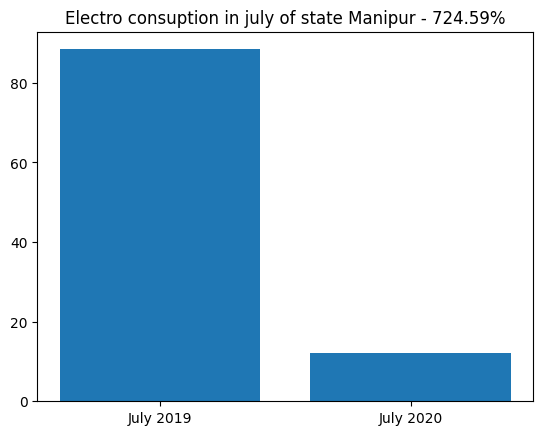

In [54]:
plt.bar(['July 2019', 'July 2020'], [sum_by_year_months['Manipur'][2019][7], sum_by_year_months['Manipur'][2020][7]])
diff = round(sum_by_year_months['Manipur'][2019][7] / sum_by_year_months['Manipur'][2020][7] * 100, 2)
plt.title(f'Electro consuption in july of state Manipur - {diff}%')
plt.show()

Хоть и энергопотребление этих штатов отличается в 1000 раз, но процент снижения энергозатрат для этих штатов практически одинаков в процентном показателе.

Также наблюдаются два локальных максимума по количеству потраченной электроэнергии в штатах Индии: в июле 2019 года и в декабре 2019 года. Если погуглить, то можно наткнуть на возможные причины этого: наводнения в июле и протесты в декабре. Точно сказать, как связан рост потребления электроэнергии с этими событиями, но наверняка если было бы больше данных, то связь найти бы удалось!)